<a href="https://colab.research.google.com/github/emad550/AI_DS/blob/main/Emad_LR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [26]:
data=pd.read_csv('sample_data/50_Startups.csv')

In [27]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [29]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [30]:
data.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

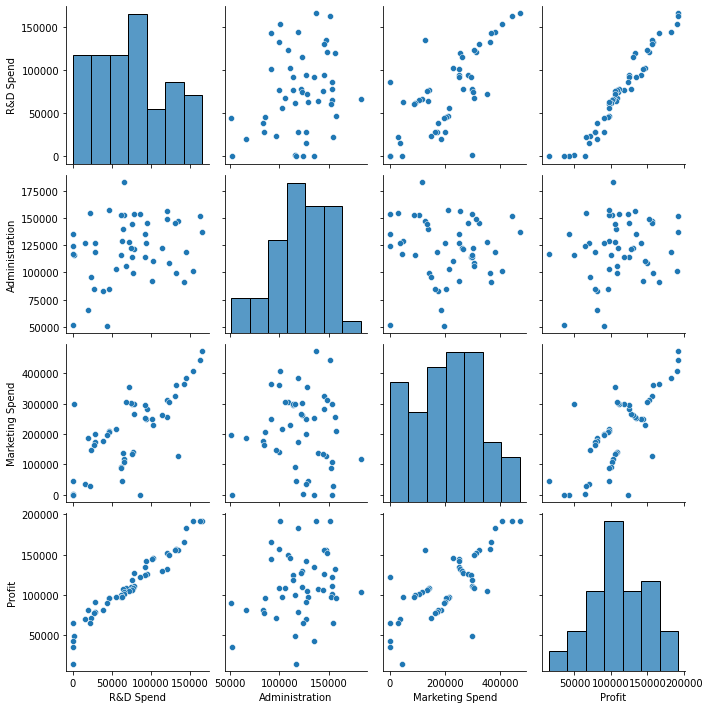

In [32]:
sns.pairplot(data)

In [33]:
import plotly.express as px

In [42]:
px.bar(y=data['Profit'],x=data['State'],color=data['Profit'])

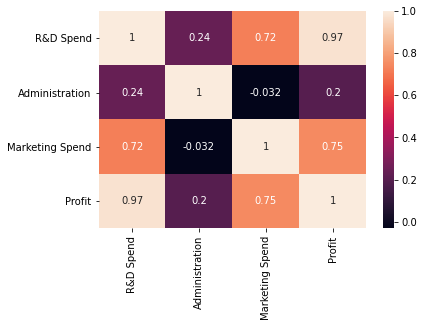

In [43]:
sns.heatmap(data.corr(),annot=True)
#we can discover positve correlation between (profir and marketing spenad),(R&d and Marketing spend) and (administration and R&D)
# also negative corr between (adminstartion and Marketing spend)

In [44]:
#we can use one hote encoding in State nut i will use dummies 
data=pd.get_dummies(data)
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [46]:
y=data['Profit']
X=data[['Administration','Marketing Spend','R&D Spend','State_California','State_Florida','State_New York']]

In [47]:
sc=StandardScaler()
m=sc.fit_transform(X)

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=100)

In [49]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)

In [50]:
model.score(x_test, y_test)

0.9100064859825239

In [64]:
y_predict=model.predict(x_test)
predict=pd.DataFrame(y_predict,y_test)
predict

,0
Profit,
156122.51,162877.200904
90708.19,72734.781062
89949.14,90998.192353
103282.38,100730.655548
69758.98,55884.994373
14681.40,48647.970829
156991.12,161960.522157
96778.92,96273.641001
118474.03,118625.800515


In [52]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_predict))

13011.672303222738

In [55]:
new=pd.DataFrame(model.coef_, X.columns, columns=["Coeff"])
new.head()

,Coeff
Administration,-0.027943
Marketing Spend,0.022766
R&D Spend,0.840872
State_California,2858.686256
State_Florida,-426.072536
